In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from zipfile import ZipFile

# Path to the zip file
zip_file_path = './processed_data_npy.zip'

# Unzip the file
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('./data/')


In [ ]:
X_train = np.load('./data/X_train.npy', allow_pickle=True)
X_test = np.load('./data/X_test.npy', allow_pickle=True)
y_train = np.load('./data/y_train.npy', allow_pickle=True)
y_test = np.load('./data/y_test.npy', allow_pickle=True)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

Accuracy: 0.901657458563536


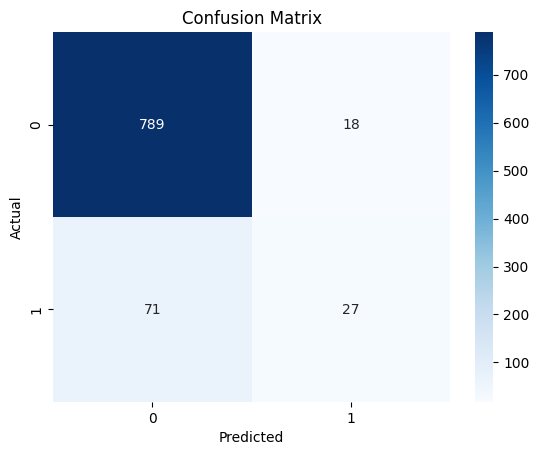

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905



In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


There is an imbalance in the data. Let's try to rebalance it with smote.

Accuracy: 0.83


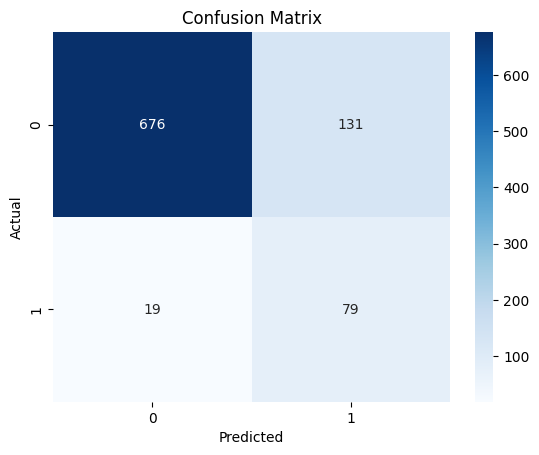

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90       807
           1       0.38      0.81      0.51        98

    accuracy                           0.83       905
   macro avg       0.67      0.82      0.71       905
weighted avg       0.91      0.83      0.86       905



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


- True Negatives (676): The model correctly identified 676 instances as class 0 (non-subscribers).
- False Positives (131): The model incorrectly predicted 131 instances as class 1 (subscribers) when they were actually class 0.
- False Negatives (19): The model missed 19 instances that were actual subscribers (class 1) and predicted them as non-subscribers.
- True Positives (79): The model correctly identified 79 instances as subscribers (class 1).


- Precision: 0.97 – When the model predicts non-subscriber, it is correct 97% of the time.
- Recall: 0.84 – Out of all actual non-subscribers, the model correctly identifies 84%.
- F1-Score: 0.90 – A good balance between precision and recall for non-subscribers.


- Improved Recall for Class 1: The recall for class 1 (subscribers) improved from 0.28 to 0.81 after applying SMOTE, indicating that the model now captures more actual subscribers.
- Trade-off in Precision: The precision for class 1 decreased to 0.38, meaning more false positives. This is typical when using SMOTE as the model focuses on detecting positives more but may make more incorrect predictions.
- Balanced Recall: The high recall for both classes suggests that the model is now more effective in identifying both subscribers and non-subscribers.
